In [4]:

import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math

In [10]:
x = sym.symbols('x')

fx = 2*x**2+x+1

sym.diff(fx)

4*x + 1

In [11]:
sym.integrate(fx) # notice no constant term

2*x**3/3 + x**2/2 + x

In [ ]:
case1

In [14]:

from __future__ import print_function # still using Python 2.7
import sympy

# create a symbolic variable for each symbol in our equation
y, x, k = sympy.symbols('y, x, k', real=True)

# define the equation y = kx - (1-k)x^2
fwd_equation= sympy.Eq(y, k*x - (k - 1)*x**2)

# solve the equation for x and print solutions
inverse= sympy.solve(fwd_equation, x)

print('found {} solutions for x:'.format(len(inverse)))
print('\n'.join([str(s) for s in inverse]))

found 2 solutions for x:
(k - sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))
(k + sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))


In [15]:
fwd_equation

Eq(y, k*x - x**2*(k - 1))

In [16]:
inverse

[(k - sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1)),
 (k + sqrt(k**2 - 4*k*y + 4*y))/(2*(k - 1))]

In [17]:
print(inverse[0].subs(k, 1.5).simplify())
print(inverse[0].subs(k, 1.375).simplify())

1.5 - 1.5*sqrt(1 - 0.888888888888889*y)
1.83333333333333 - 1.83333333333333*sqrt(1 - 0.793388429752066*y)


In [18]:
print('x =', sympy.latex(inverse[0]))

x = \frac{k - \sqrt{k^{2} - 4 k y + 4 y}}{2 \left(k - 1\right)}


In [ ]:
case2

In [21]:
from __future__ import print_function # still using Python 2.7
import sympy

# create some symbols for angles
p, q, r = sympy.symbols('p, q, r', real=True)

# create some symbols for unknown elements of lQ
x1, y1, z1 = sympy.symbols('x1, y1, z1')

# define vectors we know so far
P = sympy.Matrix([0, 0, 1])
lR = sympy.Matrix([1, 0, 0])
lQ = sympy.Matrix([x1, y1, z1])

lQ_equations = [
    sympy.Eq(lQ.dot(P), 0),              # lQ contains P
    sympy.Eq(lQ.dot(lR), -sympy.cos(p)), # angle at point P
    sympy.Eq(lQ.dot(lQ), 1)              # lQ is a unit vector
]

S = sympy.solve(lQ_equations, x1, y1, z1, dict=True, simplify=True)
print('found {} solutions for lQ:'.format(len(S)))
print('\n'.join([sympy.pretty(sln) for sln in S])) # ask for pretty output

lQ = lQ.subs(S[1])
print('now lQ is {}'.format(lQ))

found 2 solutions for lQ:
{x₁: -cos(p), y₁: -│sin(p)│, z₁: 0}
{x₁: -cos(p), y₁: │sin(p)│, z₁: 0}
now lQ is Matrix([[-cos(p)], [Abs(sin(p))], [0]])


In [22]:
lQ = lQ.subs(sympy.Abs(sympy.sin(p)), sympy.sin(p))
print('after subbing out abs, lQ is {}'.format(lQ))

after subbing out abs, lQ is Matrix([[-cos(p)], [sin(p)], [0]])


In [24]:
print('checking our work:')
print('  lQ . P  =', lQ.dot(P))
print('  lQ . lR =', lQ.dot(lR))
print('  lQ . lQ =', lQ.dot(lQ))

checking our work:
  lQ . P  = 0
  lQ . lR = -cos(p)
  lQ . lQ = sin(p)**2 + cos(p)**2


In [25]:
print('  lQ . lQ =', lQ.dot(lQ).simplify())

  lQ . lQ = 1


In [26]:
x2, y2 = sympy.symbols('x2, y2')
z2 = sympy.sqrt(1 - x2**2 - y2**2)

lP = sympy.Matrix([x2, y2, z2])
print('||lP||^2 =', lP.dot(lP))

lP_equations = [
    sympy.Eq(lP.dot(lR), -sympy.cos(q)),
    sympy.Eq(lP.dot(lQ), -sympy.cos(r)),
]

S = sympy.solve(lP_equations, x2, y2, dict=True, simplify=True)
print('got {} solutions for lP'.format(len(S)))
print('\n'.join([sympy.pretty(sln) for sln in S]))

lP = lP.subs(S[0])
print('now lP is {}'.format(lP))

||lP||^2 = 1
got 1 solutions for lP
⎧                 -(cos(p)⋅cos(q) + cos(r)) ⎫
⎨x₂: -cos(q), y₂: ──────────────────────────⎬
⎩                           sin(p)          ⎭
now lP is Matrix([[-cos(q)], [-(cos(p)*cos(q) + cos(r))/sin(p)], [sqrt(-(cos(p)*cos(q) + cos(r))**2/sin(p)**2 - cos(q)**2 + 1)]])


In [ ]:
case3

In [34]:
from __future__ import print_function
import sympy

x, y, u, v, h, s, t, l, rho, phi = sympy.symbols(
    'x, y, u, v, h, s, t, l, rho, phi', real=True)

cr = sympy.cos(rho)
sr = sympy.sin(rho)

xp =  (x - u) * cr + (y - v) * sr
yp = -(x - u) * sr + (y - v) * cr

f = ( h * sympy.exp(-xp**2 / (2*s**2) - yp**2 / (2*t**2) ) *
      sympy.cos( 2 * sympy.pi * xp / l + phi ) )

In [35]:
theta = (u, v, h, s, t, l, rho, phi)

for i, var in enumerate(theta):
    deriv = f.diff(var)
    print('grad[{}]'.format(i), '=', sympy.ccode(deriv) + ';')

grad[0] = h*(-((u - x)*sin(rho) + (-v + y)*cos(rho))*sin(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*cos(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*sin(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l)*cos(rho)/l;
grad[1] = h*(((u - x)*sin(rho) + (-v + y)*cos(rho))*cos(rho)/pow(t, 2) + ((-u + x)*cos(rho) + (-v + y)*sin(rho))*sin(rho)/pow(s, 2))*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin(rho), 2)/pow(s, 2))*cos(phi + 2*M_PI*((-u + x)*cos(rho) + (-v + y)*sin(rho))/l) + 2*M_PI*h*exp(-1.0/2.0*pow((u - x)*sin(rho) + (-v + y)*cos(rho), 2)/pow(t, 2) - 1.0/2.0*pow((-u + x)*cos(rho) + (-v + y)*sin

In [36]:
derivs = [ f.diff(var) for var in theta ]

variable_namer = sympy.numbered_symbols('sigma_')
replacements, reduced = sympy.cse(derivs, symbols=variable_namer)

for key, val in replacements:
    print('double', key, '=', sympy.ccode(val) + ';')

print()

for i, r in enumerate(reduced):
    print('grad[{}]'.format(i), '=', sympy.ccode(r) + ';')

double sigma_0 = cos(rho);
double sigma_1 = 2*sigma_0;
double sigma_2 = -u + x;
double sigma_3 = sin(rho);
double sigma_4 = -v + y;
double sigma_5 = sigma_3*sigma_4;
double sigma_6 = sigma_0*sigma_2 + sigma_5;
double sigma_7 = M_PI/l;
double sigma_8 = 2*sigma_7;
double sigma_9 = phi + sigma_6*sigma_8;
double sigma_10 = pow(s, -2);
double sigma_11 = pow(sigma_6, 2);
double sigma_12 = pow(t, -2);
double sigma_13 = u - x;
double sigma_14 = sigma_0*sigma_4;
double sigma_15 = sigma_13*sigma_3 + sigma_14;
double sigma_16 = pow(sigma_15, 2);
double sigma_17 = exp(-1.0/2.0*sigma_10*sigma_11 - 1.0/2.0*sigma_12*sigma_16);
double sigma_18 = h*sigma_17*sin(sigma_9);
double sigma_19 = sigma_10*sigma_6;
double sigma_20 = sigma_12*sigma_15;
double sigma_21 = sigma_17*cos(sigma_9);
double sigma_22 = h*sigma_21;
double sigma_23 = sigma_18*sigma_8;
double sigma_24 = sigma_2*sigma_3;

grad[0] = sigma_1*sigma_18*sigma_7 + sigma_22*(sigma_0*sigma_19 - sigma_20*sigma_3);
grad[1] = sigma_22*(sigma_0*sigma_20

In [39]:
xx= np.linspace(-10,10,101)
yy= np.linspace(-10,10,101)
xm, ym= np.meshgrid(xx,yy)
xm.shape

(101, 101)

In [40]:

#np.meshgrid?
np.mgrid[0:10, 0:10]

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],

       [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [41]:
xv= np.arange(10).reshape(-1,1)
xv

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [42]:

yv= np.ones(10).reshape(1,-1)
yv

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [43]:

xm= xv@yv
xm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [44]:

ym= xm.T
ym

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

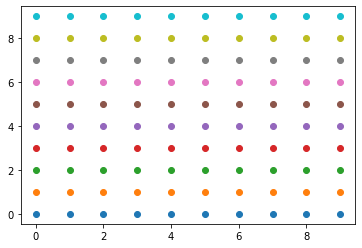

In [47]:
plt.plot(xm, ym,'o')

In [48]:

# meshgrid
iv, jv= np.ogrid[0:5, 0:10]
iv, jv

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))

In [49]:

im= iv @ np.ones_like(jv)
jm= np.ones_like(iv) @ jv
im, jm

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))

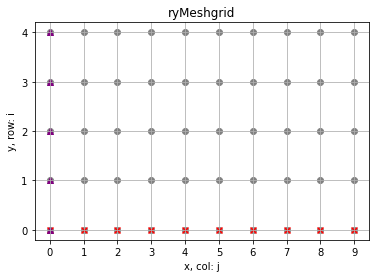

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('ryMeshgrid')
plt.xlabel('x, col: j')
plt.ylabel('y, row: i')
plt.grid(True)

plt.xticks(jv.flatten())
plt.yticks(iv.flatten())

ym, xm= im, jm

plt.scatter(xm,
            ym,
            color="gray", 
            marker="o")

plt.scatter(jv, 
            jv*0, 
            color="red", 
            marker="x")

plt.scatter(iv*0, 
            iv, 
            color="purple", 
            marker="^")

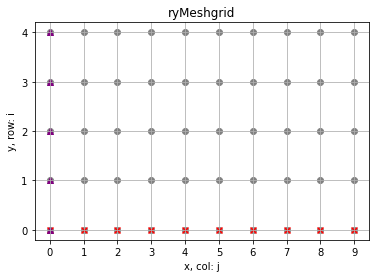

In [52]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('ryMeshgrid')
plt.xlabel('x, col: j')
plt.ylabel('y, row: i')
plt.grid(True)

plt.xticks(jv.flatten())
plt.yticks(iv.flatten())

ym, xm= im, jm

plt.scatter(xm,
            ym,
            color="gray", 
            marker="o")

plt.scatter(jv, 
            jv*0, 
            color="red", 
            marker="x")

plt.scatter(iv*0, 
            iv, 
            color="purple", 
            marker="^")

In [53]:
xm

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [54]:
ym

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

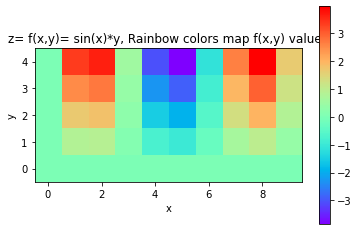

In [57]:
# 改變2D函數形式，做一些圖來瞧瞧。

zm= np.sin(xm)*ym
plt.figure()
plt.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis',
          )
plt.xlabel('x')
plt.ylabel('y')
plt.title('z= f(x,y)= sin(x)*y, Rainbow colors map f(x,y) values')
plt.colorbar()

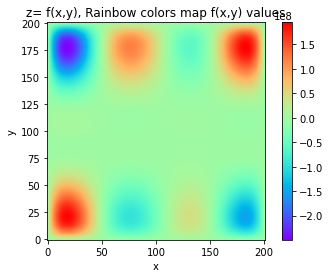

In [58]:

# 終於可以用numpy + matplotlib 畫任意 2D 函數圖形
def f(x,y):
    zx=  (x+10)*(x+5)*(x-1)*(x-5)*(x-10)
    zy=  (y+10)*(y+2)*(y+1)*(y-2)*(y-10)
    z= zx*zy
    
    return z

ym, xm= np.mgrid[-10:10.1:.1, -10:10.1:.1]
zm= f(xm,ym)
plt.figure()
plt.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis'
          )
plt.xlabel('x')
plt.ylabel('y')
plt.title('z= f(x,y), Rainbow colors map f(x,y) values')
#plt.xticks(np.arange(0,xm[0].size,step=10), xm[0,0::10])
#plt.yticks([])#ym[0])
# 但是 x,y 軸上的數值標示仍未搞定，
# 目前適用矩陣的 index (0,1,2,...)而非 x,y 的真實值

plt.colorbar()

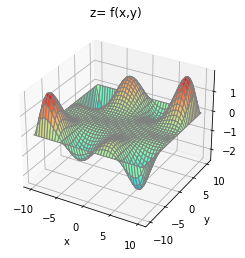

In [59]:

## 試試 3D

from mpl_toolkits import mplot3d

fg= plt.figure()

ax= plt.axes(projection='3d', 
            xlabel= 'x', 
            ylabel= 'y', 
            title= 'z= f(x,y)')

#ax.contour3D(xm, ym, zm, 100, cmap='rainbow')

'''
ax.plot_wireframe(xm, ym, zm,
                rstride= 5, 
                cstride= 5
                )
'''


#'''
ax.plot_surface(xm,ym,zm, 
                rstride= 5, 
                cstride= 5,
                cmap=     'rainbow',  
                edgecolor= 'gray'
               )
#'''

In [60]:
# 想畫 z 軸，但仍不好看！

zAxis= xm[0] / xm[0].max() * abs(zm).max()
zAxis
ax.scatter3D(xm[0]*0, 
             xm[0]*0, 
             zAxis, 
             color='magenta')

In [61]:
zAxis= xm[0] / xm[0].max() * abs(zm).max()
zAxis

array([-2.49364746e+08, -2.46871098e+08, -2.44377451e+08, -2.41883803e+08,
       -2.39390156e+08, -2.36896508e+08, -2.34402861e+08, -2.31909214e+08,
       -2.29415566e+08, -2.26921919e+08, -2.24428271e+08, -2.21934624e+08,
       -2.19440976e+08, -2.16947329e+08, -2.14453681e+08, -2.11960034e+08,
       -2.09466386e+08, -2.06972739e+08, -2.04479091e+08, -2.01985444e+08,
       -1.99491797e+08, -1.96998149e+08, -1.94504502e+08, -1.92010854e+08,
       -1.89517207e+08, -1.87023559e+08, -1.84529912e+08, -1.82036264e+08,
       -1.79542617e+08, -1.77048969e+08, -1.74555322e+08, -1.72061675e+08,
       -1.69568027e+08, -1.67074380e+08, -1.64580732e+08, -1.62087085e+08,
       -1.59593437e+08, -1.57099790e+08, -1.54606142e+08, -1.52112495e+08,
       -1.49618847e+08, -1.47125200e+08, -1.44631553e+08, -1.42137905e+08,
       -1.39644258e+08, -1.37150610e+08, -1.34656963e+08, -1.32163315e+08,
       -1.29669668e+08, -1.27176020e+08, -1.24682373e+08, -1.22188725e+08,
       -1.19695078e+08, -

In [62]:
zm.argmax(axis=0)

array([  0,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,   0, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178,   0,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,   0, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 17

In [63]:
zm.min(axis=0)

array([ 0.00000000e+00, -3.10199681e+07, -5.95115578e+07, -8.55787376e+07,
       -1.09323126e+08, -1.30844013e+08, -1.50238387e+08, -1.67600956e+08,
       -1.83024170e+08, -1.96598249e+08, -2.08411199e+08, -2.18548845e+08,
       -2.27094846e+08, -2.34130724e+08, -2.39735885e+08, -2.43987642e+08,
       -2.46961241e+08, -2.48729883e+08, -2.49364746e+08, -2.48935011e+08,
       -2.47507887e+08, -2.45148627e+08, -2.41920561e+08, -2.37885113e+08,
       -2.33101828e+08, -2.27628391e+08, -2.21520658e+08, -2.14832673e+08,
       -2.07616692e+08, -1.99923210e+08, -1.91800983e+08, -1.83297050e+08,
       -1.74456759e+08, -1.65323787e+08, -1.55940167e+08, -1.46346310e+08,
       -1.36581029e+08, -1.26681562e+08, -1.16683595e+08, -1.06621287e+08,
       -9.65272923e+07, -8.64327844e+07, -7.63674795e+07, -6.63596601e+07,
       -5.64361983e+07, -4.66225793e+07, -3.69429253e+07, -2.74200184e+07,
       -1.80753247e+07, -8.92901722e+06, -0.00000000e+00, -6.72438040e+06,
       -1.32543290e+07, -

In [64]:
zm.max()

195239585.34117356

In [65]:
ii, jj= np.where(zm == zm.max())
ii, jj

(array([178], dtype=int64), array([183], dtype=int64))

In [66]:
zm[ii,jj]

array([1.95239585e+08])

In [67]:
zm.max()

195239585.34117356

In [68]:
ii,jj

(array([178], dtype=int64), array([183], dtype=int64))

In [70]:

# 找最高與最低
zm.max(), zm.argmax()
zm.min(), zm.argmin()
imax, jmax= np.where(zm==zm.max())
imin, jmin= np.where(zm==zm.min())
imax, jmax, imin, jmin

(array([178], dtype=int64),
 array([183], dtype=int64),
 array([178], dtype=int64),
 array([18], dtype=int64))

Text([18], [178], 'min')

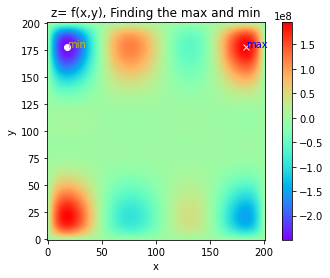

In [72]:
plt.figure()
plt.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis'
          )

plt.xlabel('x')
plt.ylabel('y')
plt.title('z= f(x,y), Finding the max and min')

plt.colorbar()

# 注意 .plot() 與 .imshow() 的座標對應 .plot(x,y) ==> .imshow(i,j)
# x,y = j,i
xmax, ymax= jmax, imax
xmin, ymin= jmin, imin

plt.plot(xmax, ymax, 'wx')
plt.plot(xmin, ymin, 'wo')
plt.text(xmax, ymax, 'max', color='b')
plt.text(xmin, ymin, 'min', color='y')